In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor


df = pd.read_csv("california_housing_data.csv")
df = df.drop(columns=['MedInc'])

In [100]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col].between(lower, upper), df[col], np.nan)

df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16491 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HouseAge     16491 non-null  float64
 1   AveRooms     16491 non-null  float64
 2   AveBedrms    16491 non-null  float64
 3   Population   16491 non-null  float64
 4   AveOccup     16491 non-null  float64
 5   Latitude     16491 non-null  float64
 6   Longitude    16491 non-null  float64
 7   MedHouseVal  16491 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [101]:
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(0.3),random_state=41)

In [103]:


model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [104]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")


MSE: 1.03
MAE: 0.81
R² Score: -0.10
RMSE: 1.01


MSE: 1.43
MAE: 0.93
R² Score: -0.07
RMSE: 1.20

dopo

MSE: 1.03
MAE: 0.81
R² Score: -0.10
RMSE: 1.01

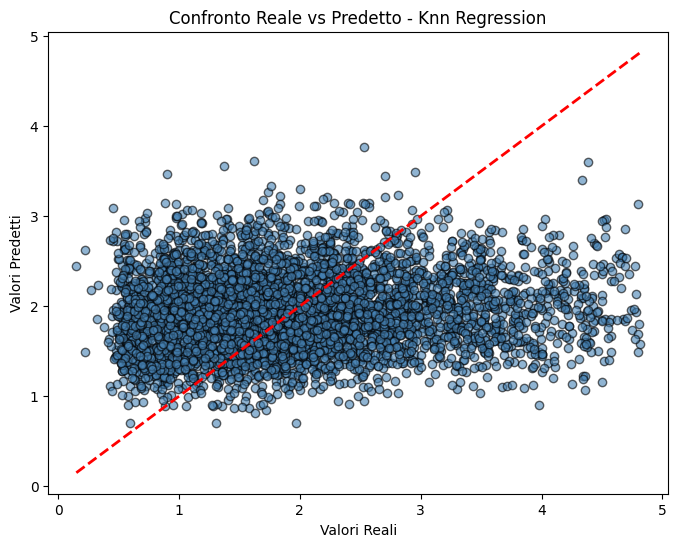

In [105]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.6, color="steelblue", edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)  # linea ideale
plt.xlabel("Valori Reali")
plt.ylabel("Valori Predetti")
plt.title("Confronto Reale vs Predetto - Knn Regression")
plt.show()


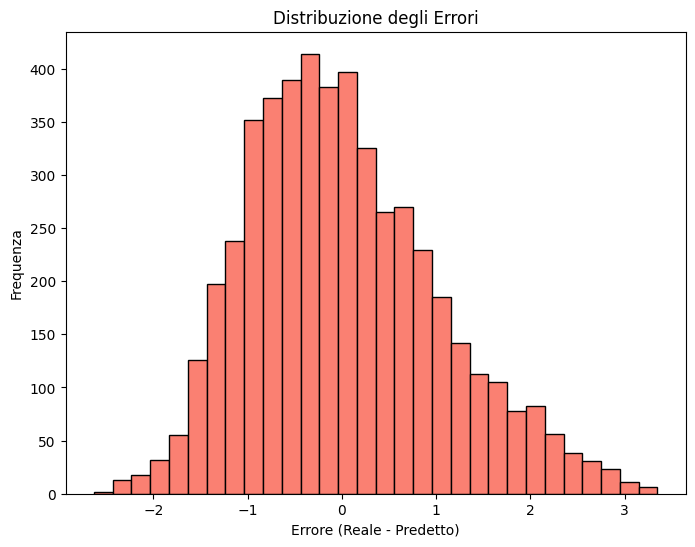

In [106]:
errors = y_test - predictions

plt.figure(figsize=(8,6))
plt.hist(errors, bins=30, color="salmon", edgecolor="black")
plt.xlabel("Errore (Reale - Predetto)")
plt.ylabel("Frequenza")
plt.title("Distribuzione degli Errori")
plt.show()


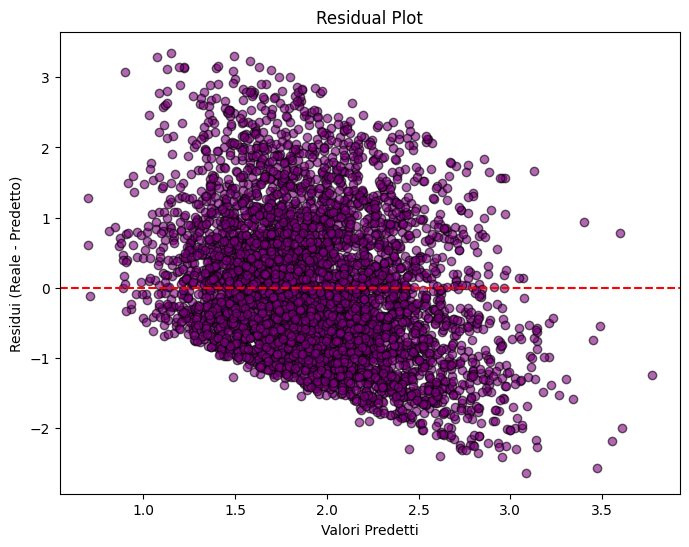

In [107]:
plt.figure(figsize=(8,6))
plt.scatter(predictions, errors, alpha=0.6, color="purple", edgecolor="k")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valori Predetti")
plt.ylabel("Residui (Reale - Predetto)")
plt.title("Residual Plot")
plt.show()
